# Import Statement

In [33]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Data Cleaning

In [4]:
data = pd.read_csv('retail_price.csv')
data.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [6]:
data.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


# Exploratory Data Analysis

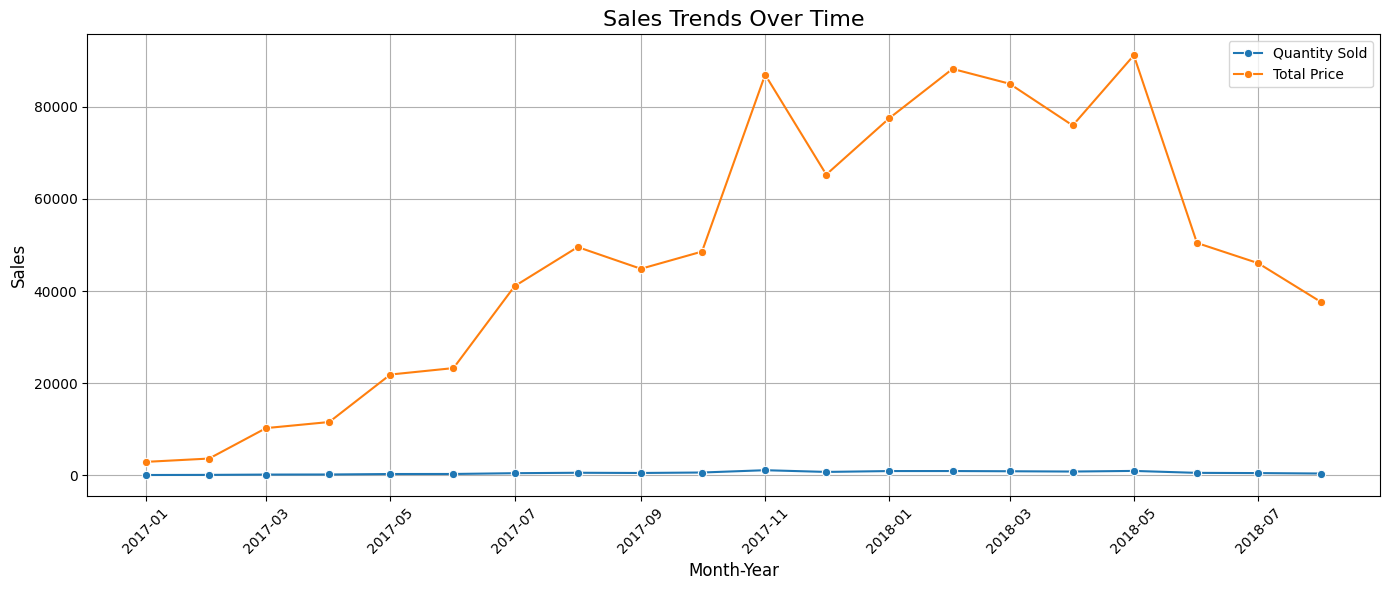

In [10]:
data['month_year'] = pd.to_datetime(data['month_year'], format='%d-%m-%Y')
monthly_sales = data.groupby('month_year').agg({'qty': 'sum', 'total_price': 'sum'}).reset_index()

# Sales trends over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='month_year', y='qty', data=monthly_sales, marker='o', label='Quantity Sold')
sns.lineplot(x='month_year', y='total_price', data=monthly_sales, marker='o', label='Total Price')
plt.title('Sales Trends Over Time', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(visible=True)
plt.tight_layout()
plt.show()

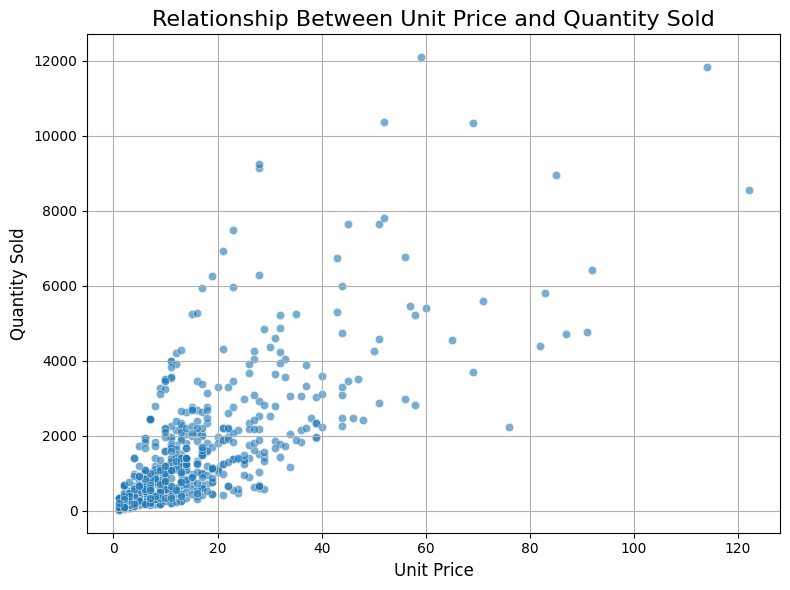

In [13]:
#  Relationship between unit_price and qty
plt.figure(figsize=(8, 6))
sns.scatterplot(x='qty', y='total_price', data=data, alpha=0.6)
plt.title('Relationship Between Unit Price and Quantity Sold', fontsize=16)
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.grid(visible=True)
plt.tight_layout()
plt.show()

In [17]:
fig = px.bar(data, x='product_category_name',
             y='total_price',
             title='Average Total Price by Product Category')
fig.show()

In [19]:
correlation_matrix = data.corr(numeric_only=True)
fig = go.Figure(go.Heatmap(x=correlation_matrix.columns,
                           y=correlation_matrix.columns,
                           z=correlation_matrix.values))
fig.update_layout(title='Correlation Heatmap of Numerical Features')
fig.show()

In [27]:
comp_price_diff = data[['product_category_name', 'unit_price', 'comp_1', 'comp_2', 'comp_3']].copy()
comp_price_diff['avg_comp_price'] = comp_price_diff[['comp_1', 'comp_2', 'comp_3']].mean(axis=1)
comp_price_diff['price_diff'] = comp_price_diff['unit_price'] - comp_price_diff['avg_comp_price']

avg_price_diff_by_ctg = comp_price_diff.groupby('product_category_name')['price_diff'].mean().reset_index()

fig = px.bar(avg_price_diff_by_ctg,
             x='product_category_name',
             y='price_diff',
             title='Average Competitor Price Difference by Product Category')
fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Average Competitor Price Difference'
)
fig.show()

# Model Training

In [36]:
# Preprocessing
label_encoder = LabelEncoder()
data['product_category_name_encoded'] = label_encoder.fit_transform(data['product_category_name'])
data['month_year_encoded'] = label_encoder.fit_transform(data['month_year'])


features = ['product_category_name_encoded', 'month_year_encoded', 'qty','freight_price', 'unit_price',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_score',
       'customers', 'weekday', 'weekend', 'holiday', 'month', 'year', 's',
       'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3',
       'ps3', 'fp3', 'lag_price']

target = 'total_price'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [37]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [38]:
y_pred = model.predict(X_test)

In [39]:
# Evaluate the model
error = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {error}")
print(f"R-squared: {r2}")

Mean Absolute Error: 262.29904411764704
R-squared: 0.7615217745806446


In [40]:
importances = model.feature_importances_
features_importance = pd.DataFrame(zip(features, importances), columns=["Feature", "Importance"])
print(features_importance.sort_values(by="Importance", ascending=False))

                          Feature  Importance
2                             qty    0.603842
27                      lag_price    0.297012
4                      unit_price    0.055303
24                         comp_3    0.018477
3                   freight_price    0.005914
26                            fp3    0.003816
18                         comp_1    0.003661
14                          month    0.001689
6      product_description_lenght    0.001621
12                        weekend    0.001346
5             product_name_lenght    0.001244
11                        weekday    0.001051
20                            fp1    0.000854
25                            ps3    0.000843
7              product_photos_qty    0.000805
10                      customers    0.000704
1              month_year_encoded    0.000597
16                              s    0.000499
17                         volume    0.000388
0   product_category_name_encoded    0.000141
21                         comp_2 

In [41]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted vs. Actual Retail Price'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted vs. Actual Retail Price',
    xaxis_title='Actual Retail Price',
    yaxis_title='Predicted Retail Price'
)
fig.show()